In [274]:
import numpy as np
import scipy.signal as sp
import cmath as cm
import matplotlib.pyplot as plt

#### Функции

In [275]:
# Вывод графиков АЧХ и ФЧХ
def printfilter(w, h, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        ax[0].plot(w, 20 * np.log10(abs(h)), 'b')

    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад')
    ax[0].grid(True)

    angles = np.unwrap(np.angle(h))
    ax[1].plot(w, angles, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)

    plt.show()


#### Исходные данные

In [276]:
# Исходные данные

# Коэффициенты прямых связей
b = [1., 0., -1.]

# Коэффициенты обратных связей
# a = [1., -1.8, -0.9]
a = [1., -1.8, 0.9]

#### Импульсная характеристика фильтра

Результаты расчета: 
1.0 1.8 1.34 0.792 0.2196 -0.3175 -0.7692 -1.0987 -1.2855 -1.325 -1.2281 -1.018 -0.7272 -0.3927 -0.0524 0.2591 0.5136 0.6912 0.782 0.7855 0.7101 0.5712 0.3891 0.1863 -0.0149 -0.1944 -0.3366 -0.4308 -0.4726 -0.4629 -0.4079


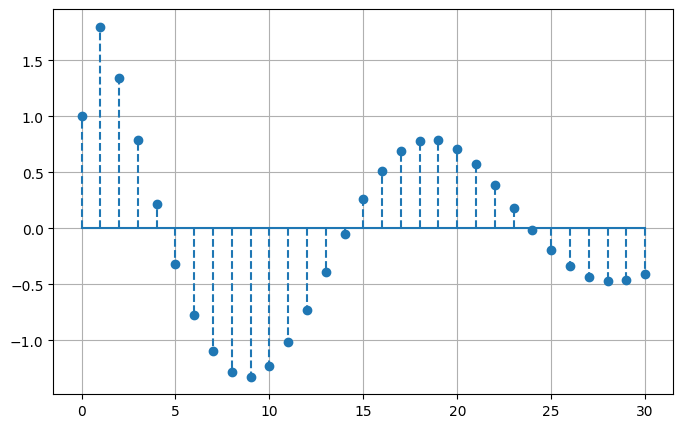

In [277]:
# Импульсная характеристика фильтра

# Входной сигнал
x = [1.] + 30*[0.]

# Отклик фильтра на воздействие единичного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.lfilter(a=a, b=b, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Диаграмма нулей и полюсов

In [278]:
# Находим нули. Решаем квадратное уравнение для числителя передаточной функции
disz = b[1]**2 - 4*b[0]*b[2]
xz1 = (-b[1] - cm.sqrt(disz)) / 2*b[0]
xz2 = (-b[1] + cm.sqrt(disz)) / 2*b[0]

print(f'Нули: {xz1:.1f}, {xz2:.1f}')

# Находим полюса. Решаем квадратное уравнение для знаменателя передаточной функции
disp = a[1]**2 - 4*a[0]*a[2]
xp1 = (-a[1] - cm.sqrt(disp)) / 2*a[0]
xp2 = (-a[1] + cm.sqrt(disp)) / 2*a[0]

print(f'Полюса: {xp1:.1f}, {xp2:.1f}')

Нули: -1.0+0.0j, 1.0+0.0j
Полюса: 0.9-0.3j, 0.9+0.3j


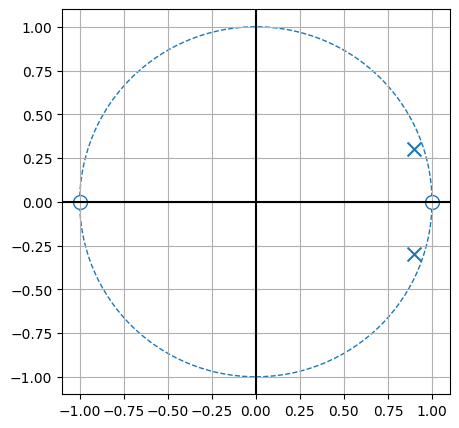

In [279]:
# Строим диаграмму нулей и полюсов

fg, ax = plt.subplots(figsize=(5, 5))
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))

circle = plt.Circle(xy=(0,0),radius=1, edgecolor='C0', facecolor='white', linestyle='--')
ax.add_patch(circle)
ax.scatter([xz1.real, xz2.real], [xz1.imag, xz2.imag], marker='o', facecolor='white', edgecolor='C0', s=100)
ax.scatter([xp1.real, xp2.real], [xp1.imag, xp2.imag], marker='x', s=100)
ax.axhline(y=0, color="black", linestyle="-")
ax.axvline(x=0, color="black", linestyle="-")
ax.grid()
plt.show()

#### Амплитудно-частотная и фазо-частотная характеристики фильтра

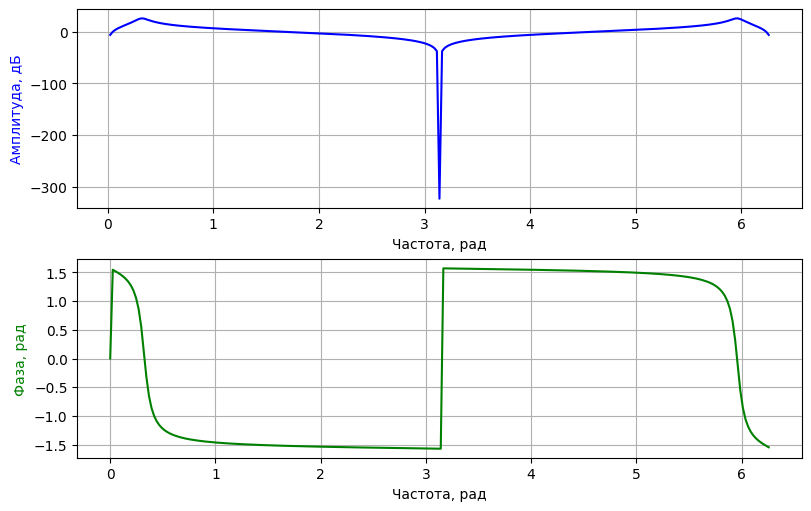

In [280]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
# include_nyquist - вычислять отклик для конечной частоты (в данном случае для 2Пи), который по умолчанию не вычисляется
w, h = sp.freqz(b=b, a=a, worN=256, whole=True, include_nyquist=True)

# Строим графики АЧХ и ФЧХ
printfilter(w=w, h=h)